In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [7]:
def avg(x_lower,x_upper):
    return (x_lower+x_upper)/2

In [8]:
def IWA(x_in,w_in):
    '''
    Inputs:
    x_in = [[4,5],[5,6]]
    w_in = [[1,2],[3,4]]
    '''
    
    #calculating y min
    
    #creating a dict of lower bounds in x_in
    a={}
    for i in range(len(x_in)):
        a[i]=x_in[i][0]
    
    #sorting the dictionary a in ascending order of values
    a=sorted(a.items(),key = lambda l:(l[1], l[0])) #a is now a list with key value pair as tuples
    
    #removing the keys from a
    new_a=[]
    for i in range(len(a)):
        new_a.append(a[i][1])
        
    #arranging w_in according to the sorted 'a'
    w_min=[]
    for i in range(len(a)):
        w_min.append(w_in[a[i][0]])
    
    #calculating average of the weighted intervals 'w_min'
    wmin_avg=[]
    for i in range(len(w_min)):
        wmin_avg.append(avg(w_min[i][0],w_min[i][1]))
    
    #calcualting the starting y min
    sum_wj=sum_wi=0
    for i in range(len(new_a)):
        sum_wj+=new_a[i]*wmin_avg[i]
        sum_wi+=wmin_avg[i]
    
    ymin_approx=sum_wj/sum_wi
    
    ymin_old=ymin_approx
    
    #iterations of KM Algorithm for ymin
    L=0
    while(True):
        
        #finding L* and L*+1
        for i in range(len(new_a)-1):
            if(ymin_old>=new_a[i] and ymin_old<=new_a[i+1]):
                L=new_a[i]
                break
        
        nsum_wj=nsum_wi=0
        for i in range(len(new_a)):
            if(new_a[i]<=L):
                nsum_wj+=new_a[i]*w_min[i][1]
                nsum_wi+=w_min[i][1]
            else:
                nsum_wj+=new_a[i]*w_min[i][0]
                nsum_wi+=w_min[i][0]
        
        #finding the new y min
        ymin_new=nsum_wj/nsum_wi
        
        if(ymin_new==ymin_old):
            break
        ymin_old=ymin_new
    
    #assinging the finally obtanied ymin_old
    
    ymin=ymin_old
    
    #calculating y max
    
    #creating a dictionary of upper bounds in x_in
    
    b={}
    for i in range(len(x_in)):
        b[i]=x_in[i][1]
    
    #sorting the dictionary b in ascending order of values
    b=sorted(b.items(),key = lambda l:(l[1], l[0])) #b is now a list with key value pair as tuples
    
    #removing the keys from b
    new_b=[]
    for i in range(len(b)):
        new_b.append(b[i][1])
    
    #arranging w_in according to the sorted 'b'
    w_max=[]
    for i in range(len(b)):
        w_max.append(w_in[b[i][0]])
    
    #calcualting the starting y max
    sum_wj_max=sum_wi_max=0
    for i in range(len(new_b)):
        sum_wj_max+=new_b[i]*wmin_avg[i]
        sum_wi_max+=wmin_avg[i]
    
    ymax_approx=sum_wj_max/sum_wi_max
    
    ymax_old=ymax_approx
    #iterations of KM Algorithm for ymax
    R=0
    while(True):
        
        #finding R* and R*+1
        for i in range(len(new_b)-1):
            if(ymax_old>=new_b[i] and ymax_old<=new_b[i+1]):
                R=new_b[i]
                break
                
        nsum_wj_max=nsum_wi_max=0
        
        for i in range(len(new_b)):
            if(new_b[i]<=R):
                nsum_wj_max+=new_b[i]*w_max[i][0]
                nsum_wi_max+=w_max[i][0]
            else:
                nsum_wj_max+=new_b[i]*w_max[i][1]
                nsum_wi_max+=w_max[i][1]
        
        #finding the new ymax
        ymax_new=nsum_wj_max/nsum_wi_max

        if(ymax_new==ymax_old):
            break
        
        ymax_old=ymax_new
        
    ymax=ymax_old
    
    return([ymin,ymax])
                

In [14]:
IWA([[8.91,10],[8.81,10]],[[8.91,10],[0,1.78]])

[8.89334892422825, 10.0]

In [9]:
def trimf_intervals(inputs):
    #making a list of x and y coordinates for each of the three points of the triangular function
    inputs_coord={}
    for i in inputs.keys():
        inputs_coord[i]={}
        for j in inputs[i].keys():
            inputs_coord[i][j]=[]
            for k in range(len(inputs[i][j])):
                if k%2==0:
                    inputs_coord[i][j].append((inputs[i][j][k],0))
                else:
                    inputs_coord[i][j].append((inputs[i][j][k],1))
    #print(inputs_coord)
    #calculating slope for each of the two lines of the triangular function
    slopes={}
    for i in inputs_coord.keys():
        slopes[i]={}
        for j in inputs_coord[i].keys():
            if(inputs_coord[i][j][0][0]-inputs_coord[i][j][1][0]!=0):
                s1=(inputs_coord[i][j][0][1]-inputs_coord[i][j][1][1])/(inputs_coord[i][j][0][0]-inputs_coord[i][j][1][0])
            else:
                s1=float("inf")
            if(inputs_coord[i][j][1][0]-inputs_coord[i][j][2][0]!=0):
                s2=(inputs_coord[i][j][1][1]-inputs_coord[i][j][2][1])/(inputs_coord[i][j][1][0]-inputs_coord[i][j][2][0])
            else:
                s2=float("inf")
            slopes[i][j]=[s1,s2]
    #print(slopes)
    alpha_intervals={}
    for alpha in np.arange(0,1.05,0.05):
        alpha_r=round(alpha,2)
        alpha_intervals[alpha_r]={}
        for i in inputs_coord.keys():
            alpha_intervals[alpha_r][i]={}
            for j in inputs_coord[i].keys():
                alpha_intervals[alpha_r][i][j]=[]
                for k in range(len(slopes[i][j])):
                    if slopes[i][j][k]!=float('inf'):
                        x=round(((alpha_r-inputs_coord[i][j][k][1])/slopes[i][j][k])+inputs_coord[i][j][k][0],2)
                    else:
                        x=round(inputs_coord[i][j][k][0],2)
                    alpha_intervals[alpha_r][i][j].append(x)
    #print(alpha_intervals)
    intervals={}
    for i in alpha_intervals.keys():
        for j in alpha_intervals[i].keys():
            if j not in intervals.keys():
                intervals[j]=[]
            l=[]
            for k in alpha_intervals[i][j].keys():
                l.append(alpha_intervals[i][j][k])
            intervals[j].append(l)
    #print(intervals)
    intervals_list=[]
    for i in intervals:
        intervals_list.append(intervals[i])
    #print(intervals_list)
    avg_IWA={}
    for i in range(0,len(intervals_list),2):
        avg_IWA[i+1]=[]
        for j in range(len(intervals_list[i])):
            IWA_input1=intervals_list[i][j]
            IWA_input2=intervals_list[i+1][j]
            avg_interval=IWA(IWA_input1,IWA_input2)
            avg_IWA[i+1].append(avg_interval)
    #print(avg_IWA)
    lower_bounds={}
    upper_bounds={}
    for i in avg_IWA.keys():
        lower_bounds[i]=[]
        upper_bounds[i]=[]
        for j in range(len(avg_IWA[i])):
            lower_bounds[i].append(avg_IWA[i][j][0])
            upper_bounds[i].append(avg_IWA[i][j][1])
    #print(lower_bounds,upper_bounds)
    
    alpha_list=[]
    for i in np.arange(0,1.05,0.05):
        alpha_list.append(round(i,2))
    #print(alpha_list)
    
    colours=['b','g','r','c','m','y','k']
    for i in avg_IWA.keys():
        fig,ax0 = plt.subplots(figsize=(8, 3))
        ax0.plot(lower_bounds[i],alpha_list, colours[i%7], linewidth=0.5, linestyle='--',label=i)
        ax0.plot(upper_bounds[i],alpha_list, colours[i%7], linewidth=0.5, linestyle='--',label=i)
        ax0.spines['top'].set_visible(False)
        ax0.spines['right'].set_visible(False)
        ax0.get_xaxis().tick_bottom()
        ax0.get_yaxis().tick_left()
        ax0.margins(y=0)
    plt.tight_layout()
    

In [10]:
l={'temperature':{'cold':[0,0,5],'hot':[5,10,10]},'weight':{'w1':[0,0,5],'w3':[5,10,10]}}

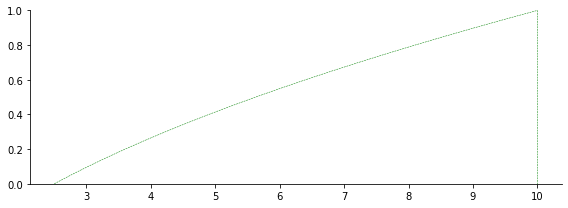

In [11]:
trimf_intervals(l)